## Step 1. Import Dataset

In [223]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [224]:
data = pd.read_csv('./data/train.csv')
data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,

In [225]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [226]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [227]:
with pd.option_context('display.max_rows', None):
    print(data.isnull().sum())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Step 2. Data Preprocessing
### 2.1. Feature Selection

In [228]:
# Use Feature Engineering to select features
features = ["MSSubClass", "MSZoning", "LotArea", "Street", "LotShape", "Utilities", "LotConfig", "LandSlope", "Neighborhood", "Condition1", "Condition2", 
            "YearBuilt", "HouseStyle", "Electrical", "1stFlrSF", "2ndFlrSF", "FullBath", "BedroomAbvGr", "TotRmsAbvGrd"]


### 2.2. Splitting dataset into X, y

In [229]:
X = data[features]
y = data['SalePrice']

### 2.3. Data Imputation (Missing Data Replacement)

In [230]:
# Finding columns with missing data
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSSubClass    1460 non-null   int64 
 1   MSZoning      1460 non-null   object
 2   LotArea       1460 non-null   int64 
 3   Street        1460 non-null   object
 4   LotShape      1460 non-null   object
 5   Utilities     1460 non-null   object
 6   LotConfig     1460 non-null   object
 7   LandSlope     1460 non-null   object
 8   Neighborhood  1460 non-null   object
 9   Condition1    1460 non-null   object
 10  Condition2    1460 non-null   object
 11  YearBuilt     1460 non-null   int64 
 12  HouseStyle    1460 non-null   object
 13  Electrical    1459 non-null   object
 14  1stFlrSF      1460 non-null   int64 
 15  2ndFlrSF      1460 non-null   int64 
 16  FullBath      1460 non-null   int64 
 17  BedroomAbvGr  1460 non-null   int64 
 18  TotRmsAbvGrd  1460 non-null   int64 
dtypes: int

In [231]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
X.loc[:,'Electrical'] = imputer.fit_transform(X[['Electrical']])[:,0]
X

,MSSubClass,MSZoning,LotArea,Street,LotShape,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,YearBuilt,HouseStyle,Electrical,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
0,60,RL,8450,Pave,Reg,AllPub,Inside,Gtl,CollgCr,Norm,Norm,2003,2Story,SBrkr,856,854,2,3,8
1,20,RL,9600,Pave,Reg,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1976,1Story,SBrkr,1262,0,2,3,6
2,60,RL,11250,Pave,IR1,AllPub,Inside,Gtl,CollgCr,Norm,Norm,2001,2Story,SBrkr,920,866,2,3,6
3,70,RL,9550,Pave,IR1,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1915,2Story,SBrkr,961,756,1,3,7
4,60,RL,14260,Pave,IR1,AllPub,FR2,Gtl,NoRidge,Norm,Norm,2000,2Story,SBrkr,1145,1053,2,4,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,7917,Pave,Reg,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1999,2Story,SBrkr,953,694,2,3,7
1456,20,RL,13175,Pave,Reg,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1978,1Story,SBrkr,2073,0,2,3,7
1457,70,RL,9042,Pave,Reg,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1941,2Story,SBrkr,1188,1152,2,4,9
1458,20,RL,9717,Pave,Reg,AllPub,Inside,Gtl,NAmes,Norm,Norm,1950,1Story,FuseA,1078,0,1,2,5


### 2.4. X, y → X_train, y_train, X_valid, y_valid

In [232]:
from sklearn.model_selection import train_test_split

# Use random_state ~ seed()
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [233]:
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape
X_train

,MSSubClass,MSZoning,LotArea,Street,LotShape,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,YearBuilt,HouseStyle,Electrical,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
618,20,RL,11694,Pave,Reg,AllPub,Inside,Gtl,NridgHt,Norm,Norm,2007,1Story,SBrkr,1828,0,2,3,9
870,20,RL,6600,Pave,Reg,AllPub,Inside,Gtl,NAmes,PosN,Norm,1962,1Story,SBrkr,894,0,1,2,5
92,30,RL,13360,Pave,IR1,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1921,1Story,SBrkr,964,0,1,2,5
817,20,RL,13265,Pave,IR1,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,2002,1Story,SBrkr,1689,0,2,3,7
302,20,RL,13704,Pave,IR1,AllPub,Corner,Gtl,CollgCr,Norm,Norm,2001,1Story,SBrkr,1541,0,2,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,60,RL,9430,Pave,Reg,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1999,2Story,SBrkr,1268,1097,2,3,8
835,20,RL,9600,Pave,Reg,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1950,1Story,SBrkr,1067,0,2,2,4
1216,90,RM,8930,Pave,Reg,AllPub,Inside,Gtl,Sawyer,RRAe,Norm,1978,1.5Fin,SBrkr,1318,584,2,4,8
559,120,RL,3196,Pave,Reg,AllPub,Inside,Gtl,Blmngtn,Norm,Norm,2003,1Story,SBrkr,1557,0,2,2,7


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Step 3. Encode Categorical Data and Feature Scaling

In [234]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols  = X.select_dtypes(include=['int64']).columns

categorical_cols_indicies = [X.columns.get_loc(col) for col in categorical_cols]
numeric_cols_indicies = [X.columns.get_loc(col) for col in numeric_cols]

ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(handle_unknown='ignore'), categorical_cols_indicies),
                  ('num', StandardScaler(), numeric_cols_indicies)],
    remainder="passthrough"
)

X_train = ct.fit_transform(X_train)
X_valid = ct.transform(X_valid)


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Step 4. Traning Machine Learning Model

In [289]:
# Use Cross-Validation
# from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# param_grid = {
#     'n_estimators': [500, 1000, 2000],
#     'learning_rate': [0.001, 0.01, 0.05],
#     'max_depth': [3, 5, 7],
#     'min_samples_leaf': [5, 10, 15],
#     'min_samples_split': [5, 10, 15]
# }
    
# GridSearchCV(GradientBoostingRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
rf_model = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.01, max_depth=5, min_samples_leaf=10, min_samples_split=10)
rf_model.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=5, min_samples_leaf=10,
                          min_samples_split=10, n_estimators=1000)

In [290]:
rf_val_preds = rf_model.predict(X_valid)

In [291]:
rf_val_preds[:10], y_valid[: 10]

(array([319490.8860613 , 137652.36234548, 128428.8914324 , 203492.08300594,
         92539.40047422, 103936.97355691, 235882.97925654, 129705.95763321,
        589045.1322927 , 155705.99833253]),
 529     200624
 491     133000
 459     110000
 279     192000
 655      88000
 1013     85000
 1403    282922
 601     141000
 1182    745000
 687     148800
 Name: SalePrice, dtype: int64)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Step 5. Model Evaluation

In [292]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [293]:
mae = mean_absolute_error(y_valid, rf_val_preds)
mse = mean_squared_error(y_valid, rf_val_preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_valid, rf_val_preds)
mape = np.mean(np.abs((y_valid - rf_val_preds)/y_valid)) * 100
rf_model.score(X_valid, y_valid)

0.82885759881284

In [294]:
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")

Mean Absolute Error (MAE): 21198.4915869998
Mean Squared Error (MSE): 1181883745.0778325
Root Mean Squared Error (RMSE): 34378.536110163746
R-squared (R²): 0.82885759881284
Mean Absolute Percentage Error (MAPE): 11.861092288525768%


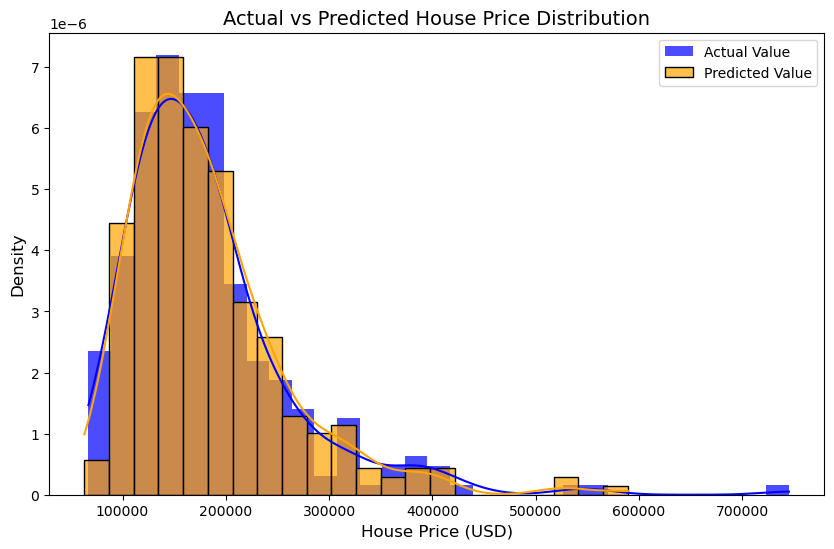

In [295]:
plt.figure(figsize=(10, 6))

# Draw histogram for actual values
sns.histplot(y_valid, color='blue', kde=True, label='Actual Value', stat='density', linewidth=0, alpha=0.7)

# Draw histogram for predicted values
sns.histplot(rf_val_preds, color='orange', kde=True, label='Predicted Value', stat='density', alpha=0.7)

# Add title and label
plt.title("Actual vs Predicted House Price Distribution", fontsize=14)
plt.xlabel("House Price (USD)", fontsize=12)
plt.ylabel("Density", fontsize=12)

# Add legend to differentiate between the two
plt.legend();


